# Creating the train_set csv
saves currently into downloads

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np

In [2]:
# CMA ##
CMA = pd.read_csv(r'C:\\Users\\kfps86\\Downloads\\CMA_train_set2.csv')


# CMA_s ##
CMA_s = pd.read_csv(r'C:\\Users\\kfps86\\Downloads\\train_set_CMA_correct_subject2.csv')

# unique_questions ##
unique_questions = pd.read_csv(r'C:\\Users\\kfps86\\Downloads\\unique_questions2.csv')

# day_count_train_set2 ##
day_count_train_set2 = pd.read_csv(r'C:\\Users\\kfps86\\Downloads\\day_count_train_set2.csv')

# train_set ##
train_set = pd.read_csv(r'C:\\Users\\kfps86\\Downloads\\train_set_draft_1.csv')

# question
question = pd.read_csv(r'C:\\Users\\kfps86\\Downloads\\question_metadata.csv')


# need to change DateAnswered and DateOfBirth columns to datetime format
train_set['DateAnswered'] = pd.to_datetime(train_set['DateAnswered'], format='%Y-%m-%d %H:%M:%S.%f')
train_set['DateOfBirth'] = pd.to_datetime(train_set['DateOfBirth'], format='%Y-%m-%d %H:%M:%S.%f')

# change SubjectId to list format
question['SubjectId'] = question['SubjectId'].str.strip('[]').str.split(',')

# Merge datasets
train_set = train_set.merge(CMA[['AnswerId', 'CMA']], how='inner', on=['AnswerId'])
train_set = train_set.merge(CMA_s[['AnswerId', 'CMA_correct_subject']], how='inner', on=['AnswerId'])
train_set = train_set.merge(unique_questions[['QuestionId', 'total_q_answered']], how='inner', on=['QuestionId'])
train_set = train_set.merge(day_count_train_set2[['AnswerId', 'holiday', 'unique_day', 'yr2']], how='inner', on=['AnswerId'])
train_set = train_set.merge(question[['QuestionId', 'SubjectId']], how='inner', on=['QuestionId'])

# train_set.to_csv(r'C:\\Users\\kfps86\\Downloads\\train_set.csv')
train_set.head()

,Unnamed: 0,QuestionId,UserId,AnswerId,IsCorrect,DateAnswered,Confidence,Gender,DateOfBirth,PremiumPupil,...,49,692,71,CMA,CMA_correct_subject,total_q_answered,holiday,unique_day,yr2,SubjectId
0,0,2453,88059,11540829,1,2019-04-02 21:15:00,75.0,0,2005-08-01,0.0,...,0,0,1,0.805369,0.625000,870,0,36,0,"[3, 71, 100, 189]"
1,0,2453,88059,11540829,1,2019-04-02 21:15:00,75.0,0,2005-08-01,0.0,...,0,0,1,0.806667,0.625000,870,0,36,0,"[3, 71, 100, 189]"
2,26183,2453,49396,10903750,0,2019-12-02 23:02:00,75.0,2,2005-08-01,0.0,...,0,0,1,0.369231,0.369565,870,0,7,1,"[3, 71, 100, 189]"
3,80972,2453,78485,18583255,1,2019-05-01 15:35:00,75.0,2,2005-08-01,0.0,...,0,0,1,0.610526,0.363636,870,0,20,0,"[3, 71, 100, 189]"
4,80972,2453,78485,18583255,1,2019-05-01 15:35:00,75.0,2,2005-08-01,0.0,...,0,0,1,0.608392,0.363636,870,0,20,0,"[3, 71, 100, 189]"


In [3]:
del CMA
del CMA_s
del unique_questions
del day_count_train_set2
del question

# Add in Additional columns
columns to be addded
* add in subjects categories top 20 influential

* time since last answered question
* weekend/weekday
* time (time is_morning, is_evening etc) 
* term
* age when answered
* add those extra columns

In [4]:
train_set.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
train_set['age'] = train_set['DateAnswered'] - train_set['DateOfBirth'] 

In [6]:
train_set['total_answered'] = train_set.groupby(['UserId'])['IsCorrect'].transform('count')
train_set['total_correct'] = train_set.groupby(['UserId'])['IsCorrect'].transform('sum')
train_set['prop_correct'] = train_set['total_correct'] / train_set['total_answered']

In [7]:
# set which term it is (include subsequent holidays in the term)
train_set['term'] = 6

train_set.loc[((train_set['DateAnswered'] >= '2018-09-04') & (train_set['DateAnswered'] < '2018-10-29')) |
              ((train_set['DateAnswered'] >= '2019-09-02') & (train_set['DateAnswered'] < '2019-10-28')),
              'term'] = 1
              
train_set.loc[((train_set['DateAnswered'] >= '2018-10-29') & (train_set['DateAnswered'] < '2019-01-03')) |
              ((train_set['DateAnswered'] >= '2019-10-28') & (train_set['DateAnswered'] < '2020-01-06')),
              'term'] = 2
              
train_set.loc[((train_set['DateAnswered'] >= '2019-01-03') & (train_set['DateAnswered'] < '2019-02-25')) |
              ((train_set['DateAnswered'] >= '2020-01-06') & (train_set['DateAnswered'] < '2020-02-24')),
              'term'] = 3
              
train_set.loc[((train_set['DateAnswered'] >= '2019-02-25') & (train_set['DateAnswered'] < '2019-04-23')) |
              ((train_set['DateAnswered'] >= '2020-02-24') & (train_set['DateAnswered'] < '2020-04-20')),
              'term'] = 4
              
train_set.loc[((train_set['DateAnswered'] >= '2019-04-23') & (train_set['DateAnswered'] < '2019-06-03')) |
              ((train_set['DateAnswered'] >= '2020-04-20') & (train_set['DateAnswered'] < '2020-06-01')),
              'term'] = 5

In [8]:
# set the time of day
train_set['is_morning'] = 0
train_set.loc[(train_set['DateAnswered'].dt.strftime("%H:%M:%S") >= '08:00:00') &
              (train_set['DateAnswered'].dt.strftime("%H:%M:%S") < '12:00:00')
               , 'is_morning'] = 1

train_set['is_afternoon'] = 0
train_set.loc[(train_set['DateAnswered'].dt.strftime("%H:%M:%S") >= '12:00:00') &
              (train_set['DateAnswered'].dt.strftime("%H:%M:%S") < '16:00:00')
               , 'is_afternoon'] = 1

train_set['is_evening'] = 0
train_set.loc[(train_set['DateAnswered'].dt.strftime("%H:%M:%S") >= '16:00:00') &
              (train_set['DateAnswered'].dt.strftime("%H:%M:%S") < '20:00:00')
               , 'is_evening'] = 1

train_set['is_night'] = 0
train_set.loc[((train_set['DateAnswered'].dt.strftime("%H:%M:%S") >= '20:00:00') &
              (train_set['DateAnswered'].dt.strftime("%H:%M:%S") <= '23:59:59')) |
              (train_set['DateAnswered'].dt.strftime("%H:%M:%S") < '08:00:00')
               , 'is_night'] = 1

In [9]:
# set whether a weekend or not
train_set['is_weekend'] = 0
train_set.loc[train_set['DateAnswered'].dt.dayofweek > 4, 'is_weekend'] = 1

In [10]:
# time since last answered question
train_set.sort_values(['UserId', 'DateAnswered'], inplace=True)
train_set['last_answered'] = train_set['DateAnswered'] - datetime.datetime.strptime('2018-09-01 00:00:00', '%Y-%m-%d %H:%M:%S')
train_set['repeat'] = (train_set['UserId']==train_set['UserId'].shift(1))
train_set.loc[train_set['repeat'] == True, 'last_answered'] = train_set['DateAnswered'].diff() 


In [11]:
# change columns to floats so can be analysed by the algo
train_set['age'] = train_set['age'].dt.total_seconds()/60/60/24/365.25
train_set['last_answered'] = train_set['last_answered'].dt.total_seconds()/60/60/24

In [12]:
# read in question
question = pd.read_csv(r'C:\\Users\\kfps86\\Downloads\\question_metadata.csv')
question.head()

,QuestionId,SubjectId
0,13090,"[3, 32, 71, 77, 141, 185, 186, 214]"
1,1855,"[3, 71, 75, 86, 178]"
2,10423,"[3, 32, 38, 239]"
3,2290,"[3, 32, 33, 144]"
4,12785,"[3, 32, 33, 144]"


In [13]:
question['SubjectId'] = question['SubjectId'].str.strip('[]').str.split(',')

In [14]:
from sklearn.preprocessing import MultiLabelBinarizer

# https://stackoverflow.com/questions/45312377/how-to-one-hot-encode-from-a-pandas-column-containing-a-list
# create a one hot encoding column for each category
# uses up a lot of RAM though
mlb = MultiLabelBinarizer(sparse_output=True)

question = question.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(question.pop('SubjectId')),
                index=question.index,
                columns=mlb.classes_))
question.head()

,QuestionId,100,101,102,103,104,105,1059,106,107,...,91,92,93,94,95,96,97,98,99,3
0,13090,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1855,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,10423,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2290,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,12785,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [15]:
train_set = train_set.merge(question[['QuestionId', ' 144', ' 32', ' 202', ' 49', ' 203',
                    ' 204', ' 54', ' 71', ' 100', ' 55', ' 260', ' 58',
                    ' 62', ' 1647', ' 200', ' 278', ' 70', ' 36', ' 184',
                    ' 34']], how='inner', on='QuestionId')

In [16]:
del question

look at removing columns we're not going to use

In [17]:
train_set[' 71'] = train_set[' 71_x'] 
train_set[' 32'] = train_set[' 32_x'] 
train_set[' 49'] = train_set[' 49_x'] 

train_set.drop(['DateAnswered', 'DateOfBirth', 'SubjectId', ' 71_y',
                ' 71_x', ' 32_x', ' 32_y', ' 49_x', ' 49_y'], axis=1, inplace=True)

train_set.head()

,QuestionId,UserId,AnswerId,IsCorrect,Confidence,Gender,PremiumPupil,DateOfBirthImputed,ConfidenceImputed,PremiumPupilImputed,...,1647,200,278,70,36,184,34,71,32,49
0,26878,0,8532998,1,75.0,2,0.0,0,1,1,...,0,0,0,1,0,0,0,0,0,1
1,26878,38,11909589,0,75.0,2,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,26878,53,15740669,0,75.0,2,0.0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,26878,58,11249865,1,75.0,2,0.0,1,1,1,...,0,0,0,1,0,0,0,0,0,1
4,26878,202,2579083,0,75.0,2,0.0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
corr = train_set.corr()

In [ ]:
corr['IsCorrect'].abs().sort_values(ascending=False)

In [ ]:
fig, ax = plt.subplots(figsize=(40,40))
ax = sns.heatmap(corr)

Save the heatmap
Save train_set

seems to large to be able to save unfortunately

In [ ]:
# train_set.to_csv(r'C:\\Users\\kfps86\\Downloads\\train_set_vF.csv')
# plt.savefig(r'C:\\Users\\kfps86\\Downloads\\train_set_vF_heatmap_v1.png')

# Feature Selection
Firstly look to see if any features are highly correlated,
if so remove the one which is least correlated to 'IsCorrect'

In [18]:
# located highly correlated columns
# https://www.projectpro.io/recipes/drop-out-highly-correlated-features-in-python
cor_matrix = corr.abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)

NameError: name 'corr' is not defined

In [ ]:
del cor_matrix
del upper_tri
del to_drop

In [ ]:
# remove the one which is least correlated to 'IsCorrect'

In [29]:
corr['total_correct'].abs().sort_values(ascending=False)

total_correct          1.000000
total_answered         0.961834
unique_day             0.280762
prop_correct           0.165820
DateOfBirthImputed     0.123409
age                    0.121916
CMA                    0.118683
Gender                 0.115714
CMA_correct_subject    0.109990
yr2                    0.090070
IsCorrect              0.078544
ConfidenceImputed      0.067224
is_night               0.064921
 101                   0.055847
is_morning             0.049289
 144                   0.045514
 32                    0.043952
is_weekend             0.031043
term                   0.030108
 278                   0.029626
last_answered          0.028798
 202                   0.026895
repeat                 0.023758
holiday                0.021663
 203                   0.018757
total_q_answered       0.017387
 204                   0.017154
PremiumPupil           0.016709
 55                    0.016279
 36                    0.012099
 119                   0.009933
 200    

In [ ]:
# total_correct & total_answered
print('total_correct: ' + str(corr['IsCorrect']['total_correct']))
print('total_answered: ' + str(corr['IsCorrect']['total_answered']))

In [19]:
# total_correct is lower so drop total_correct
train_set.drop(['total_correct'], axis=1, inplace=True)

In [ ]:
train_set.columns

# Running model like hte textbook says
going to leave this until we have a model trained for time,
also unsure how it works, so just going to follow through with
the tutorial from the textbook

In [21]:
train_set

,QuestionId,UserId,AnswerId,IsCorrect,Confidence,Gender,PremiumPupil,DateOfBirthImputed,ConfidenceImputed,PremiumPupilImputed,...,1647,200,278,70,36,184,34,71,32,49
0,26878,0,8532998,1,75.0,2,0.0,0,1,1,...,0,0,0,1,0,0,0,0,0,1
1,26878,38,11909589,0,75.0,2,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,26878,53,15740669,0,75.0,2,0.0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,26878,58,11249865,1,75.0,2,0.0,1,1,1,...,0,0,0,1,0,0,0,0,0,1
4,26878,202,2579083,0,75.0,2,0.0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31949897,26879,114522,6146599,1,75.0,2,0.0,0,1,1,...,1,0,0,0,0,0,0,0,1,0
31949898,26879,114522,6146599,1,75.0,2,0.0,0,1,1,...,1,0,0,0,0,0,0,0,1,0
31949899,26879,114522,6146599,1,75.0,2,0.0,0,1,1,...,1,0,0,0,0,0,0,0,1,0
31949900,15626,114522,5712152,1,75.0,2,0.0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# drop QuestionId, UserId and AnswerId as we cannot use it for category
train_set.drop(['QuestionId', 'UserId', 'AnswerId'], axis=1, inplace=True)

In [23]:
train_set.columns

Index(['IsCorrect', 'Confidence', 'Gender', 'PremiumPupil',
       'DateOfBirthImputed', 'ConfidenceImputed', 'PremiumPupilImputed',
       ' 101', ' 1156', ' 119', ' 149', ' 151', ' 692', 'CMA',
       'CMA_correct_subject', 'total_q_answered', 'holiday', 'unique_day',
       'yr2', 'age', 'total_answered', 'prop_correct', 'term', 'is_morning',
       'is_afternoon', 'is_evening', 'is_night', 'is_weekend', 'last_answered',
       'repeat', ' 144', ' 202', ' 203', ' 204', ' 54', ' 100', ' 55', ' 260',
       ' 58', ' 62', ' 1647', ' 200', ' 278', ' 70', ' 36', ' 184', ' 34',
       ' 71', ' 32', ' 49'],
      dtype='object')

## Feature Scaling
using either min-max scalinng and / or standardisation

In [21]:
# create the IsCorrect_labels and seperate from train_set
IsCorrect = train_set.drop(['IsCorrect'], axis=1)
IsCorrect_labels = train_set['IsCorrect'].copy()

In [22]:
del train_set
import gc
gc.collect()

33

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    # imputer replaces values which are na (currently missing)
    # this is applied to all attributes
   # ('imputer', SimpleImputer(strategy='median')),
# adding in attributes as explained on pg 74
    # again we've done this
    #     ('attribs_adder', CombinedAttributesAdder()),
    # StandardScaler is standardisation
    ('std_scaler', StandardScaler())
    ])

# IsCorrect_num_tr = num_pipeline.fit_transform(IsCorrect_num)

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# drop Ids from dataset - cannot onehotencode them

num_attribs = ['CMA', 'CMA_correct_subject', 'total_q_answered', 'unique_day', 'age','total_answered', 'prop_correct']
cat_attribs = IsCorrect.drop(num_attribs, axis=1).columns

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', MinMaxScaler(), cat_attribs)
])

IsCorrect_prepared = full_pipeline.fit_transform(IsCorrect)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:572: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:572: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


# Baseline Model
## starting with a simple linear model
this is probably not appropriate
https://stackoverflow.com/questions/48264720/how-to-convert-the-output-of-the-predict-method-of-any-classifier-in-sklearn
have rounded to either 1 or 0 

In [36]:
# train a simple linear Regression model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(IsCorrect_prepared, IsCorrect_labels)

LinearRegression()

In [40]:

print('Predictions:', np.round(np.clip(lin_reg.predict(full_pipeline.transform(IsCorrect.iloc[:5])), 0, 1)))

Predictions: [1. 1. 1. 1. 0.]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:572: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [34]:
# this and above should have run

LinearRegression()

In [42]:
# look at performance metrics
from sklearn.metrics import mean_squared_error
IsCorrect_predictions = np.round(np.clip(lin_reg.predict(IsCorrect_prepared), 0, 1))

lin_mse = mean_squared_error(IsCorrect_labels, IsCorrect_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.5107451540077599

## Simple logistic Regression Classifier
as suggested in https://stackoverflow.com/questions/48264720/how-to-convert-the-output-of-the-predict-method-of-any-classifier-in-sklearn
as an alternative to linear regression for this model

**crashed so tomorrow will need to go through and try to run this**

this will be my baseline model

*will probably have to go through and defend hyperparamaters*

In [48]:
# the below won't run so looking at what is currently stored in memory
del train_set

In [46]:
IsCorrect

,Confidence,Gender,PremiumPupil,DateOfBirthImputed,ConfidenceImputed,PremiumPupilImputed,101,1156,119,149,...,1647,200,278,70,36,184,34,71,32,49
0,75.0,2,0.0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,75.0,2,0.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,75.0,2,0.0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,75.0,2,0.0,1,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,75.0,2,0.0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31949897,75.0,2,0.0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
31949898,75.0,2,0.0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
31949899,75.0,2,0.0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
31949900,75.0,2,0.0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
IsCorrect_prepared

In [31]:
# note this actually has run successfully thank god
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=1.0, penalty='l1', solver='liblinear')
log_reg.fit(IsCorrect_prepared, IsCorrect_labels)
log_reg_predictions = log_reg.predict(IsCorrect_prepared) # will give you 0 or 1 as the class
log_reg_predictions

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [30]:
from sklearn.metrics import mean_squared_error
log_reg_mse = mean_squared_error(IsCorrect_labels, log_reg_predictions)
log_reg_rmse = np.sqrt(log_reg_mse)
log_reg_rmse

0.5093292229633207

In [35]:
# save the model
import joblib
joblib.dump(log_reg, r'C:\\Users\\kfps86\\Downloads\\log_reg_v0.pkl')

# and later to load
# log_reg_loaded = joblib.load('log_reg_v0.pkl')

['C:\\\\Users\\\\kfps86\\\\Downloads\\\\log_reg_v0.pkl']

In [27]:
import joblib
# and later to /load
log_reg = joblib.load(r'C:\\Users\\kfps86\\Downloads\\log_reg_v0.pkl')

finish by looking at the GridSearch part of the textbook p82
do some final tweaking, but this here is the baseline
may be worth using a baseline with no additional variables at all

In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
     'C': np.logspace(-4,4,20),
     'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
     'max_iter': [100, 1000, 2500, 5000]}
]

grid_search = GridSearchCV(log_reg, param_grid, cv=3,
                          scoring='neg_mean_squared_error',
                          return_train_score=True,
                          verbose=True,
                          n_jobs=-1)

grid_search.fit(IsCorrect_prepared, IsCorrect_labels)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


MemoryError: Unable to allocate 7.78 GiB for an array with shape (21299934, 49) and data type float64

In [32]:
del IsCorrect
gc.collect()

8952

# Better Model
Now look at promising models select and train the best one
then do hyperparamater tuning

In [1]:
IsCorrect_prepared

NameError: name 'IsCorrect_prepared' is not defined

# Feature Selection Pt 2
going to leave this until we have a model trained for time,
also unsure how it works, so just going to follow through with
the tutorial from the textbook

Feature Selection using Chi-Squared Test
chosen because data is categorical
https://towardsdatascience.com/categorical-feature-selection-via-chi-square-fc558b09de43


In [ ]:
# how the code definied it above
# however am manually selecting ass a lot of categories have been inputted as numbers
# I believe if a null hypothesis rejected then we should use it
# categorical_columns = train_set.select_dtypes(exclude = 'number').drop('Loan_Status', axis = 1).columns
# categorical_columns

In [64]:
categorical_columns = train_set.drop(['IsCorrect', 'CMA', 'CMA_correct_subject',
                                     'total_q_answered', 'unique_day', 'age',
                                     'total_answered', 'prop_correct'], axis=1).columns
categorical_columns

MemoryError: Unable to allocate 5.71 GiB for an array with shape (24, 31949902) and data type int64

In [74]:
del IsCorrect_labels
dir()

NameError: name 'IsCorrect_labels' is not defined

In [36]:
from scipy.stats import chi2_contingency


chi2_check = []
for i in categorical_columns:
    if chi2_contingency(pd.crosstab(train_set['IsCorrect'], train_set[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')
res = pd.DataFrame(data = [categorical_columns, chi2_check] 
             ).T 
res.columns = ['Column', 'Hypothesis']
print(res)

                 Column                      Hypothesis
0            QuestionId          Reject Null Hypothesis
1                UserId          Reject Null Hypothesis
2              AnswerId          Reject Null Hypothesis
3            Confidence          Reject Null Hypothesis
4                Gender          Reject Null Hypothesis
5          PremiumPupil          Reject Null Hypothesis
6    DateOfBirthImputed          Reject Null Hypothesis
7     ConfidenceImputed          Reject Null Hypothesis
8   PremiumPupilImputed          Reject Null Hypothesis
9                   101          Reject Null Hypothesis
10                 1156          Reject Null Hypothesis
11                  119          Reject Null Hypothesis
12                  149          Reject Null Hypothesis
13                  151  Fail to Reject Null Hypothesis
14                  692          Reject Null Hypothesis
15              holiday          Reject Null Hypothesis
16                  yr2          Reject Null Hyp

In [ ]:
# once the above is done probably remove the other columns

In [ ]:
# trying chi-swuare with this

In [ ]:
from sklearn.feature_selection import SelectKBest

def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [37]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
X, y = load_digits(return_X_y=True)
X.shape

(1797, 64)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:572: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
<ipython-input-41-62c6d8f2524a>:11: RuntimeWarning: divide by zero encountered in log10
  scores = -np.log10(selector.pvalues_)


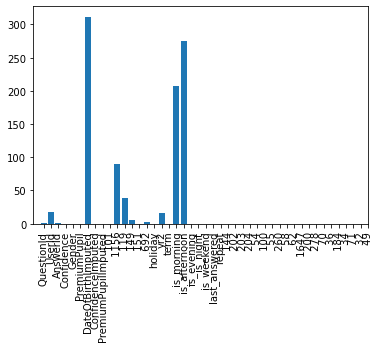

In [41]:
# source:https://datascience.stackexchange.com/questions/10773/how-does-selectkbest-work
# note uses f_classif not chi2
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif

predictors = categorical_columns

# Perform feature selection
selector = SelectKBest(f_classif, k=5)
selector.fit(train_set[predictors], train_set["IsCorrect"])

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)

# Plot the scores.  See how "Pclass", "Sex", "Title", and "Fare" are the best?
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:572: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
<ipython-input-45-c4bd97ee2940>:12: RuntimeWarning: divide by zero encountered in log10
  scores = -np.log10(selector.pvalues_)


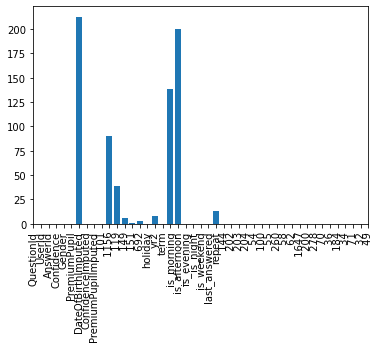

In [45]:
# note uses f_classif not chi2
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2

predictors = categorical_columns

# Perform feature selection
selector = SelectKBest(chi2, k=5)
selector.fit(train_set[predictors], train_set["IsCorrect"])

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)

# Plot the scores.  See how "Pclass", "Sex", "Title", and "Fare" are the best?
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

In [48]:
train_set.columns[selector.get_support()]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 53 but corresponding boolean dimension is 45

In [44]:
selector.pvalues_

array([5.84182294e-002, 8.47033779e-019, 2.01365509e-001, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 1.26760932e-312, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 4.60359147e-091, 8.34676746e-040,
       1.84393624e-006, 5.52903111e-001, 2.83131402e-003, 0.00000000e+000,
       4.37239205e-016, 0.00000000e+000, 1.02137686e-207, 1.74650478e-275,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000])